# **TASK2**

In [176]:
#importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('World Indicators.csv') #reading World Indicator Data

In [164]:
df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


Filtering the DATA

In [21]:
df_Filter = df

In [22]:
df_Filter = df_Filter.drop("Energy Usage",axis=1)
df_Filter = df_Filter.drop("Lending Interest",axis=1)

In [23]:
df_Filter= df_Filter.dropna(subset=['Birth Rate','Business Tax Rate','GDP','Infant Mortality Rate','Health Exp % GDP','Health Exp/Capita','Hours to do Tax','Mobile Phone Usage'])

In [24]:
for column in ['GDP']:
        print(column)
        df_Filter[column] = df_Filter[column].apply(lambda c : c[1:] if c.startswith("$") else c)
        df_Filter[column] = df_Filter[column].apply(lambda c : c.replace(',','') if ',' in c else c)

GDP


In [25]:
for column in ['Health Exp/Capita']:
        print(column)
        df_Filter[column] = df_Filter[column].apply(lambda c : c[1:] if c.startswith("$") else c)
        df_Filter[column] = df_Filter[column].apply(lambda c : c.replace(',','') if ',' in c else c)

Health Exp/Capita


In [26]:
df_Filter['Business Tax Rate'] = df_Filter['Business Tax Rate'].str.rstrip('%').astype('float') / 100.0

In [27]:
df_Filter

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,0.720,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,0.521,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,0.659,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,0.195,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,0.435,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,0.279,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname
202,0.015,0.291,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago
204,0.013,0.465,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,0.419,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay


In [28]:
df_Filter_Num = df_Filter.iloc[: , :-2]
df_Filter_Num

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.025,0.720,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682
1,0.046,0.521,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409
2,0.037,0.659,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423
3,0.024,0.195,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565
4,0.042,0.435,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,0.279,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663
202,0.015,0.291,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089
204,0.013,0.465,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809
205,0.015,0.419,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946


In [30]:
#Scaling the data and coverting into data frame
X = MinMaxScaler().fit_transform(df_Filter_Num)
df_Filter_Num = pd.DataFrame(X, columns = df_Filter_Num.iloc[:, 0:16].columns)
df_Filter_Num

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077
167,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000
168,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340
169,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724


Applying K-means and Hierarchial Clustering on Complete Dataset

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-10
K = range(2, 20)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(df_Filter_Num)
    labels = algorithm.labels_
    sil.append(silhouette_score(df_Filter_Num, labels))

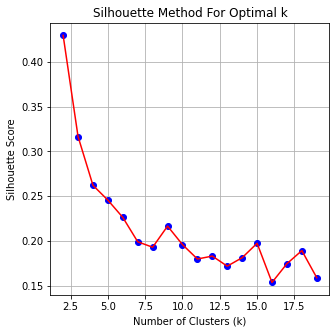

In [32]:
fig, (ax2) = plt.subplots(ncols =1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax2.plot(K,sil, 'bo')
ax2.plot(K, sil, 'r-', alpha = 1)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

In [33]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(df_Filter_Num)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0]


In [34]:
df_Filter['Kmeans_cluster'] = y 

In [166]:
#Grouping by the predicted_class_by_Kmeans and listing the similar countries
dfgroupk = df_Filter.groupby('Kmeans_cluster', as_index = False)['Country'].agg(list)
dfgroupk

,Kmeans_cluster,Country
0,0,"[Egypt, Arab Rep., Mauritius, Morocco, Seychel..."
1,1,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."


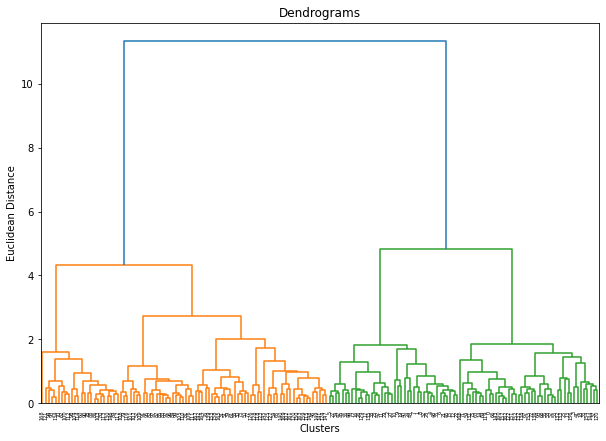

In [36]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cut_tree
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_Filter_Num, method='ward'))
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

In [37]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hierarchial_clusters = cluster.fit_predict(df_Filter_Num)
hierarchial_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [39]:
df_Filter['Predicted_class_byHierarchial'] = hierarchial_clusters
df_Filter

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,Kmeans_cluster,Predicted_class_byHierarchial
0,0.025,0.720,25.0,199070864638,0.044,233,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,0
1,0.046,0.521,66.0,104115863405,0.034,178,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,0
2,0.037,0.659,29.0,7294900431,0.045,34,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,0
3,0.024,0.195,60.0,15292424757,0.052,404,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,0
4,0.042,0.435,13.0,10395757480,0.064,39,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,0.279,694.0,4363219094,0.060,490,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,0,0
202,0.015,0.291,41.0,23676348287,0.053,935,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,0,1
204,0.013,0.465,5.0,15533800000000,0.177,8467,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,0,1
205,0.015,0.419,7.0,47236710623,0.088,1213,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,0,1


In [40]:
#Grouping by the predicted_class_by_hierarchial and listing the similar countries
dfgroupH = df_Filter.groupby('Predicted_class_byHierarchial', as_index = False)['Country'].agg(list)
dfgroupH

,Predicted_class_byHierarchial,Country
0,0,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
1,1,"[Mauritius, Morocco, Seychelles, Tunisia, Arme..."


Internal Validation for Kmeans 

In [175]:
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score


In [148]:
#CH Ratio
calinski_harabasz_score(df_Filter_Num, df_Filter['Kmeans_cluster'])

192.54525050508803

In [139]:
#Dunn Index
dist = pairwise_distances(df_Filter_Num)
dunn_kmeans = dunn(dist, df_Filter['Kmeans_cluster'])
dunn_kmeans

0.12192108167876109

In [143]:
#Silhoette score
silhouette_score(df_Filter_Num, df_Filter['Kmeans_cluster'])

0.42987453131766545

Internal Validation for Hierarchical

In [144]:
#CH Score
calinski_harabasz_score(df_Filter_Num, df_Filter['Predicted_class_byHierarchial'])

184.87996192103543

In [145]:
#Dunn Index
dist = pairwise_distances(df_Filter_Num)
dunn_kmeans = dunn(dist, df_Filter['Predicted_class_byHierarchial'])
dunn_kmeans

0.14142629053178707

In [146]:
#Silhouette Score
silhouette_score(df_Filter_Num, df_Filter['Predicted_class_byHierarchial'])

0.4176400922367597

**On the Whole Dataset Kmeans Clustering Algorithm and Hierarchial Clustering is performed. The silhouette_score will be in between (-1,1). For Kmeans The silhouette_score for Kmeans is greater than silhouette_score for Hierarchial Clustering. So Kmeans has efficiently categorized the data.**

Grouping columns to generate Optimum results


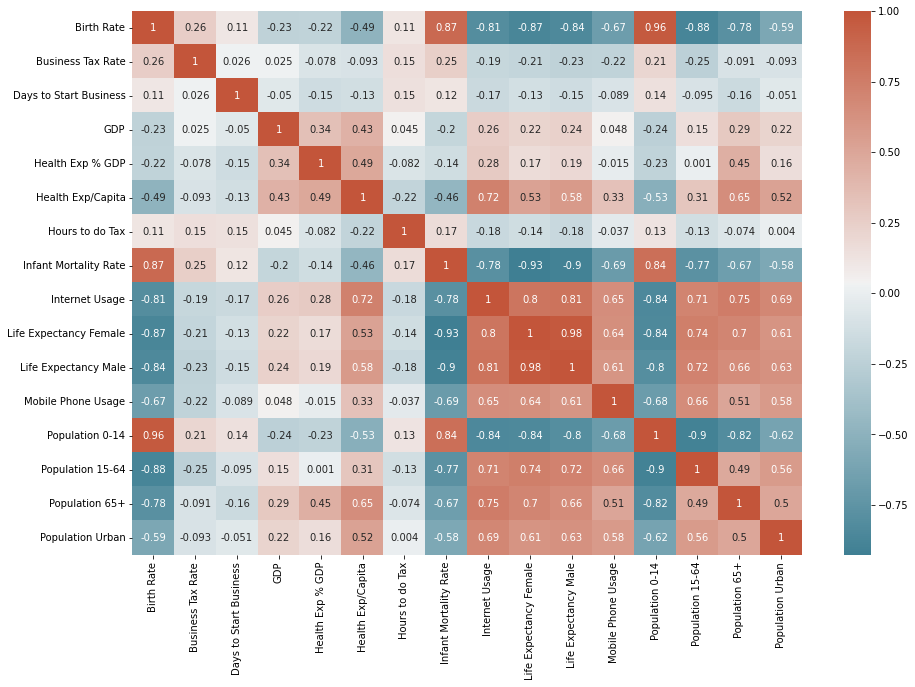

In [41]:
corr = df_Filter_Num.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

'Mobile Phone Usage' vs 'Internet Usage' vs 'Population Urban'

In [69]:
df_group1 = df_Filter[['Mobile Phone Usage', 'Internet Usage','Population Urban','Country']]
df_group1_Num =df_Filter[['Mobile Phone Usage', 'Internet Usage','Population Urban']]


In [70]:
df_group1_Num

,Mobile Phone Usage,Internet Usage,Population Urban
0,0.9,0.1,0.682
1,0.5,0.1,0.409
2,0.8,0.0,0.423
3,1.5,0.1,0.565
4,0.5,0.0,0.265
...,...,...,...
201,1.0,0.3,0.663
202,1.4,0.6,0.089
204,0.9,0.7,0.809
205,1.4,0.5,0.946


In [71]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil1 = []
# Number of clusters in range 2-10
K = range(2, 20)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(df_group1_Num)
    labels = algorithm.labels_
    sil1.append(silhouette_score(df_group1_Num, labels))

In [72]:
sil1

[0.4776076527500778,
 0.3694183771879653,
 0.3710858794727964,
 0.31485223264373674,
 0.3059692158263344,
 0.2811720376121719,
 0.26652035133358304,
 0.28538364066132693,
 0.27831508661992316,
 0.2942745400810478,
 0.25179015627777784,
 0.3030081411607255,
 0.2830995966006875,
 0.2812242015934286,
 0.29315447098479164,
 0.29112286532236825,
 0.29755966722701294,
 0.29661837999717505]

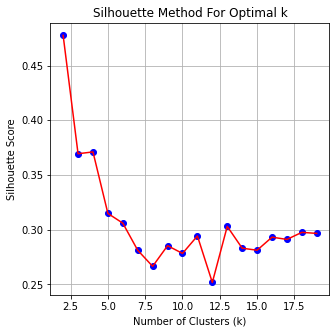

In [73]:
fig, (ax2) = plt.subplots(ncols =1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax2.plot(K,sil1, 'bo')
ax2.plot(K, sil1, 'r-', alpha = 1)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

In [74]:
values = df_group1_Num.values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

In [75]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


(171,)

In [76]:
df_group1['Kmeanscluster'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_group1

,Mobile Phone Usage,Internet Usage,Population Urban,Country,Kmeanscluster
0,0.9,0.1,0.682,Algeria,0
1,0.5,0.1,0.409,Angola,0
2,0.8,0.0,0.423,Benin,0
3,1.5,0.1,0.565,Botswana,1
4,0.5,0.0,0.265,Burkina Faso,0
...,...,...,...,...,...
201,1.0,0.3,0.663,Suriname,1
202,1.4,0.6,0.089,Trinidad and Tobago,1
204,0.9,0.7,0.809,United States,1
205,1.4,0.5,0.946,Uruguay,1


In [79]:
#Grouping according to Countries
dfcountry = df_group1.groupby('Kmeanscluster', as_index = False)['Country'].agg(list)
dfcountry

,Kmeanscluster,Country
0,0,"[Algeria, Angola, Benin, Burkina Faso, Burundi..."
1,1,"[Botswana, Egypt, Arab Rep., Gabon, Mauritius,..."


'Mobile Phone Usage' vs 'Life Expectancy Female' vs 'Life Expectancy Male'

In [152]:
df_group2 = df_Filter[['Mobile Phone Usage', 'Life Expectancy Female','Life Expectancy Male','Country']]
df_group2_Num =df_Filter[['Mobile Phone Usage', 'Life Expectancy Female','Life Expectancy Male']]

In [153]:
df_group2_Num

,Mobile Phone Usage,Life Expectancy Female,Life Expectancy Male
0,0.9,72.0,69.0
1,0.5,53.0,50.0
2,0.8,60.0,58.0
3,1.5,46.0,47.0
4,0.5,56.0,55.0
...,...,...,...
201,1.0,74.0,67.0
202,1.4,73.0,66.0
204,0.9,81.0,76.0
205,1.4,80.0,73.0


In [154]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil1 = []
# Number of clusters in range 2-10
K = range(2, 20)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(df_group2_Num)
    labels = algorithm.labels_
    sil1.append(silhouette_score(df_group2_Num, labels))

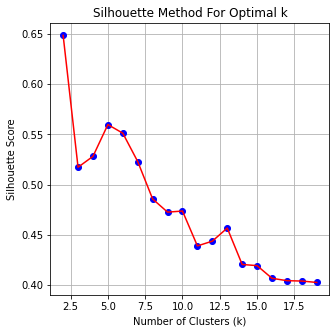

In [155]:
fig, (ax2) = plt.subplots(ncols =1)
fig.set_figheight(5)
fig.set_figwidth(5)
ax2.plot(K,sil1, 'bo')
ax2.plot(K, sil1, 'r-', alpha = 1)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Method For Optimal k')
ax2.grid(True)

In [158]:
values = df_group2_Num.values

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values) 
    wcss.append(kmeans.inertia_)

In [159]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(values)
print(y)
y.shape

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(171,)

In [160]:
df_group2['Kmeanscluster'] = y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
df_group2

,Mobile Phone Usage,Life Expectancy Female,Life Expectancy Male,Country,Kmeanscluster
0,0.9,72.0,69.0,Algeria,0
1,0.5,53.0,50.0,Angola,1
2,0.8,60.0,58.0,Benin,1
3,1.5,46.0,47.0,Botswana,1
4,0.5,56.0,55.0,Burkina Faso,1
...,...,...,...,...,...
201,1.0,74.0,67.0,Suriname,0
202,1.4,73.0,66.0,Trinidad and Tobago,0
204,0.9,81.0,76.0,United States,0
205,1.4,80.0,73.0,Uruguay,0


In [163]:
#Grouping According to Countries
dfcountryg = df_group2.groupby('Kmeanscluster', as_index = False)['Country'].agg(list)
dfcountryg

,Kmeanscluster,Country
0,0,"[Algeria, Egypt, Arab Rep., Mauritius, Morocco..."
1,1,"[Angola, Benin, Botswana, Burkina Faso, Burund..."


Generating various Scatter plot and coloring on the basis of groups

Mobile Phone Usage vs Population Urban

In [80]:
df_Filter_Num

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077
167,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000
168,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340
169,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724


In [169]:
X=df_Filter_Num.iloc[:, [11,15]].values

In [170]:
X

array([[0.45      , 0.65093304],
       [0.25      , 0.35126235],
       [0.4       , 0.36663008],
       [0.75      , 0.52250274],
       [0.25      , 0.19319429],
       [0.1       , 0.0219539 ],
       [0.25      , 0.47420417],
       [0.1       , 0.33040615],
       [0.15      , 0.14379802],
       [0.15      , 0.20965971],
       [0.1       , 0.34577387],
       [0.45      , 0.60153677],
       [0.45      , 0.46542261],
       [0.1       , 0.74862788],
       [0.55      , 0.37431394],
       [0.35      , 0.33369923],
       [0.        , 0.13282108],
       [0.1       , 0.09659715],
       [0.75      , 0.84632272],
       [0.4       , 0.52799122],
       [0.45      , 0.46652031],
       [0.2       , 0.28979144],
       [0.25      , 0.40834248],
       [0.35      , 0.16575192],
       [0.3       , 0.18002195],
       [0.25      , 0.43139407],
       [0.2       , 0.26015368],
       [0.15      , 0.07464325],
       [0.4       , 0.30625686],
       [0.45      , 0.5312843 ],
       [0.

In [171]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)


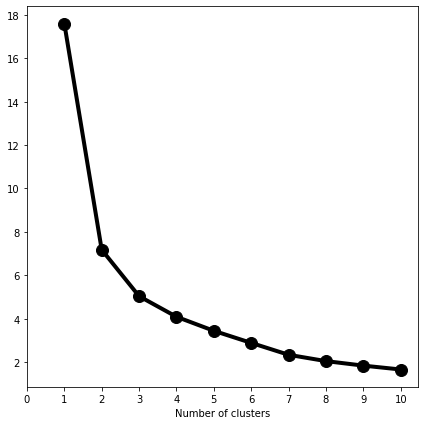

In [172]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [173]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 2, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(X)
print(y)
y.shape

[1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1]


(171,)

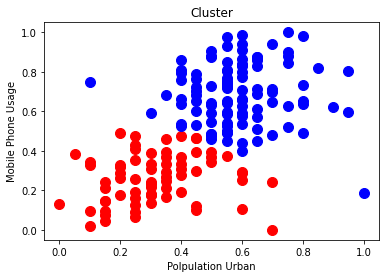

In [174]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Cluster')
plt.ylabel('Mobile Phone Usage')
plt.xlabel('Polpulation Urban')
plt.show()

From The above Graph we can infer that more no of countries with high urban population has high mobile Phone Usage as identified from most mobile usage countries

Mobile Phone Usage vs Internet Usage

In [108]:
X=df_Filter_Num.iloc[:, [11,8]].values

In [ ]:
X

In [115]:
wcss1 = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss1.append(kmeans.inertia_)

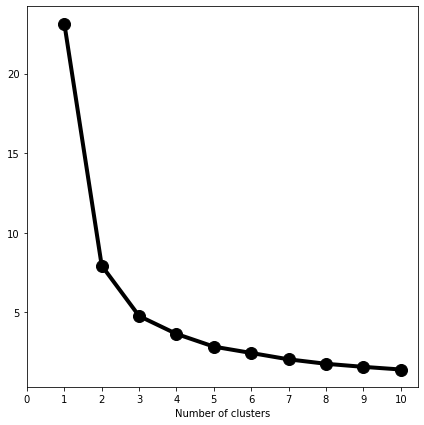

In [116]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss1, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [118]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(X)
print(y)
y.shape

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 2 0 1 1 0 0 2 1 2 1 0 2 0 0 0 1 2 0 0 1
 0 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 1 1 1 2
 2 2 2 2 1 1 2 2 0 0 2 1 2 1 1 2 1 2 0 2 1 0 0 2 0 0 0 0 1 1 2 2 0 1 1 2 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 2 2 1 1]


(171,)

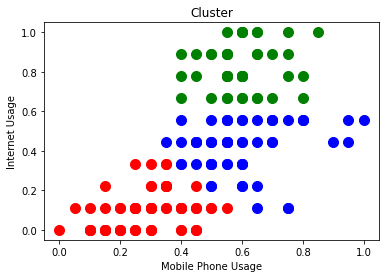

In [121]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('Mobile Phone Usage')
plt.ylabel('Internet Usage')
plt.show()

Population Urban vs Internet Usage

In [124]:
X=df_Filter_Num.iloc[:, [15,8]].values

In [ ]:
X

In [126]:
wcss1 = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss1.append(kmeans.inertia_)

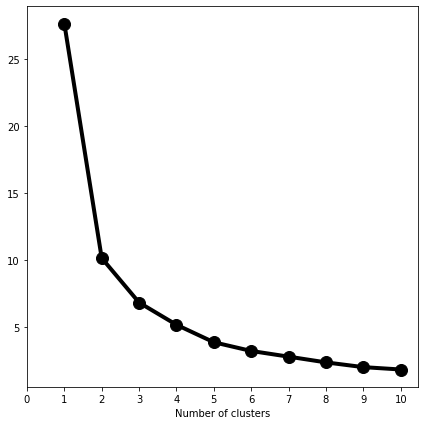

In [127]:
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss1, linewidth=4, markersize=12,marker='o',color = 'black')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("")
plt.show()

In [131]:
# finding the clusters based on input matrix "values"
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y = model.fit_predict(X)
print(y)
y.shape

[2 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0
 2 0 2 0 2 0 0 0 0 2 0 0 0 2 2 0 0 1 0 2 2 0 0 1 2 1 0 0 1 2 0 0 2 1 0 0 0
 0 0 2 2 1 2 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 2 2 2 2 2 1
 1 1 1 1 2 2 1 1 2 2 1 2 1 1 2 1 1 1 0 1 2 0 0 1 0 0 0 0 2 1 1 2 0 2 1 1 1
 2 2 2 2 2 0 0 0 0 2 2 2 0 2 2 2 2 2 2 2 1 1 2]


(171,)

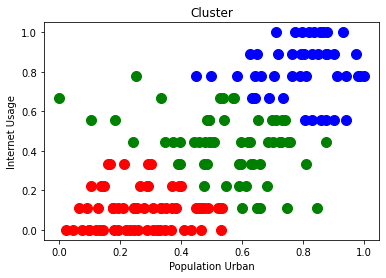

In [133]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Cluster')
plt.xlabel('Population Urban')
plt.ylabel('Internet Usage')
plt.show()

Evaluation Metrics :

1.   DunnIndex = (intercluster distance) /(divided by the highest
intracluster distance)
2.   CH Coefficient.       CH =(SSBM/(M−1))/(SSEM/M)
3.   silhouette_score.     s(i) = (b(i) −a(i))/max{a(i),b(i)}